In [10]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam


In [20]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load the training and test datasets
training_set = train_datagen.flow_from_directory(
    'D:\\leaf disease\\tomato\\dataset\\train',
    target_size=(128, 128),
    batch_size=64,
    class_mode='categorical')

test_set = test_datagen.flow_from_directory(
    'D:\\leaf disease\\tomato\\dataset\\val',
    target_size=(128, 128),
    batch_size=64,
    class_mode='categorical')


Found 10000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [22]:


# Initialize the CNN
classifier = Sequential()

# Convolutional layers
classifier.add(Conv2D(32, (3, 3), input_shape=(128, 128, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(16, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
classifier.add(Flatten())

# Dense layers
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.5))

classifier.add(Dense(units=10, activation='softmax'))

# Compile the CNN
classifier.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


In [23]:
print(classifier.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 61, 61, 16)        4624      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 30, 30, 16)       0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 14400)             0         
                                                                 
 dense_9 (Dense)             (None, 128)              

In [24]:
# Fit the model to the data
history=classifier.fit_generator(
    training_set,
    steps_per_epoch=len(training_set),
    epochs=100,
    validation_data=test_set,
    validation_steps=len(test_set))


C:\Users\ayush\AppData\Local\Temp\ipykernel_21096\3424651111.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=classifier.fit_generator(


Epoch 1/100
157/157 [==============================] - 44s 276ms/step - loss: 1.9437 - accuracy: 0.2914 - val_loss: 1.4439 - val_accuracy: 0.4750
Epoch 2/100
157/157 [==============================] - 45s 283ms/step - loss: 1.3510 - accuracy: 0.5264 - val_loss: 1.1963 - val_accuracy: 0.5630
Epoch 3/100
157/157 [==============================] - 42s 268ms/step - loss: 1.1309 - accuracy: 0.6075 - val_loss: 0.9918 - val_accuracy: 0.6260
Epoch 4/100
157/157 [==============================] - 43s 274ms/step - loss: 1.0301 - accuracy: 0.6418 - val_loss: 0.8994 - val_accuracy: 0.6730
Epoch 5/100
157/157 [==============================] - 43s 275ms/step - loss: 0.9666 - accuracy: 0.6574 - val_loss: 0.9602 - val_accuracy: 0.6440
Epoch 6/100
157/157 [==============================] - 43s 275ms/step - loss: 0.9054 - accuracy: 0.6776 - val_loss: 0.6865 - val_accuracy: 0.7610
Epoch 7/100
157/157 [==============================] - 44s 279ms/step - loss: 0.8603 - accuracy: 0.7011 - val_loss: 0.7788 -

In [25]:
classifier.save_weights('tomato.h5')
print('Saved trained model weights as tomato.h5')

Saved trained model weights as tomato.h5


In [26]:
classifier.evaluate(test_set)

16/16 [==============================] - 1s 55ms/step - loss: 0.4398 - accuracy: 0.8720


[0.43979936838150024, 0.871999979019165]

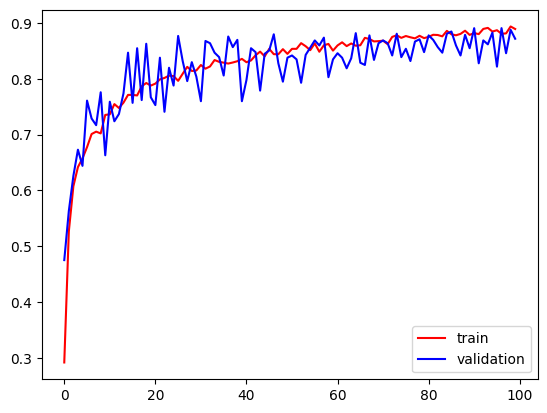

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

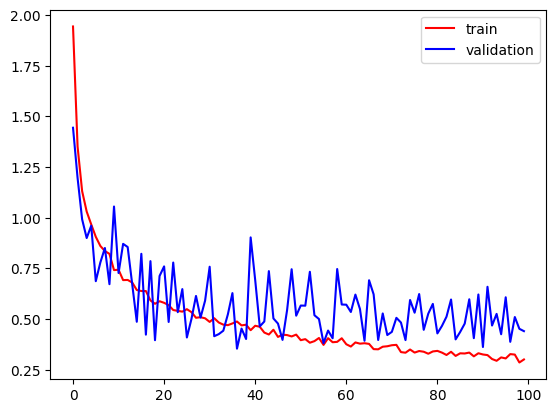

In [28]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()